<a href="https://colab.research.google.com/github/ebonhart99/Organics_Products_Case_Study/blob/main/Organics_Products_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the data into a pandas dataframe

data_path = '/content/drive/My Drive/CSV Uploads/organics.csv'
df = pd.read_csv(data_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
# making a df2 for later when I use a decision tree and don't want to mess up my original dataset too much
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
# drop unnecessary columns
df.drop(['ID'], axis=1, inplace=True)

# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
# drop unnecessary columns for df2
df2.drop(['ID'], axis=1, inplace=True)

# Convert response from an integer to a categorical variable
df2['TargetBuy'] = df2['TargetBuy'].astype('category')
df2.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [ ]:
# checking to see if my target variable did convert to categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          21138 non-null  float64 
 1   DemAge           20715 non-null  float64 
 2   DemCluster       21549 non-null  float64 
 3   DemClusterGroup  21549 non-null  object  
 4   DemGender        19711 non-null  object  
 5   DemReg           21758 non-null  object  
 6   DemTVReg         21758 non-null  object  
 7   PromClass        22223 non-null  object  
 8   PromSpend        22223 non-null  float64 
 9   PromTime         21942 non-null  float64 
 10  TargetBuy        22223 non-null  category
 11  TargetAmt        22223 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
# checking for nulls
df.isnull().sum()

DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [ ]:
# getting rid of nulls by using .dropna() and checking to see if it worked
df.dropna(inplace=True)
df.isnull().sum()

DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
TargetAmt          0
dtype: int64

In [ ]:
# getting rid of nulls by using .dropna() and checking to see if it worked
df2.dropna(inplace=True)
df2.isnull().sum()

DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
TargetAmt          0
dtype: int64

# Exploratory Analysis

In [ ]:
# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime',
       'TargetAmt'],
      dtype='object')

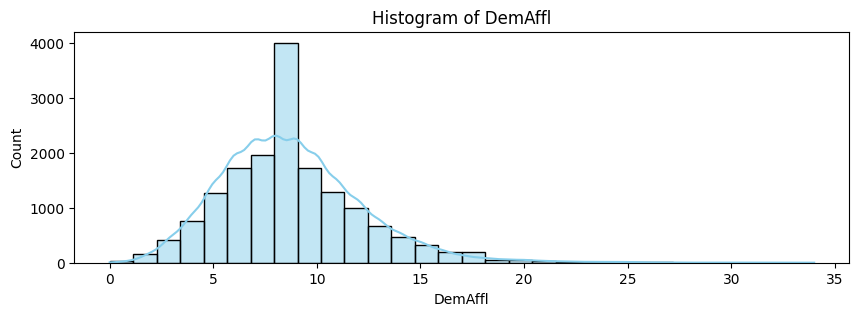

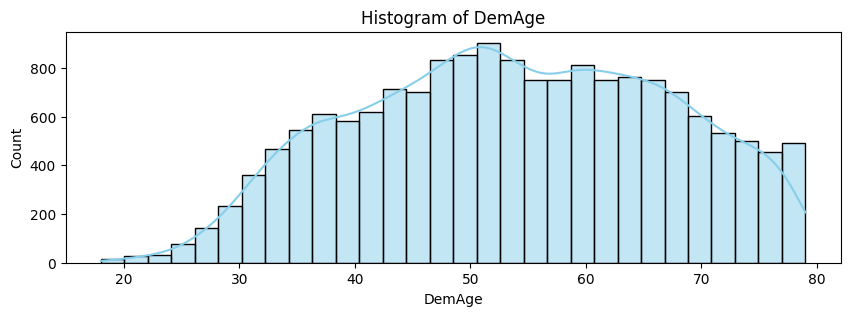

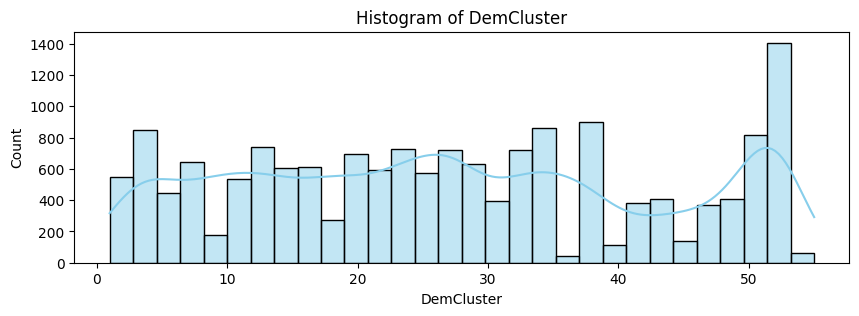

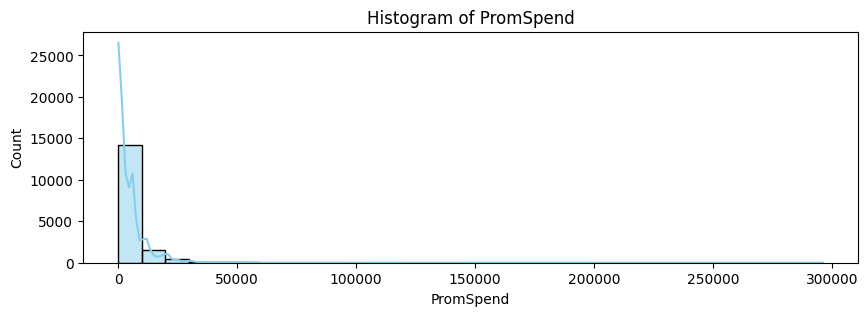

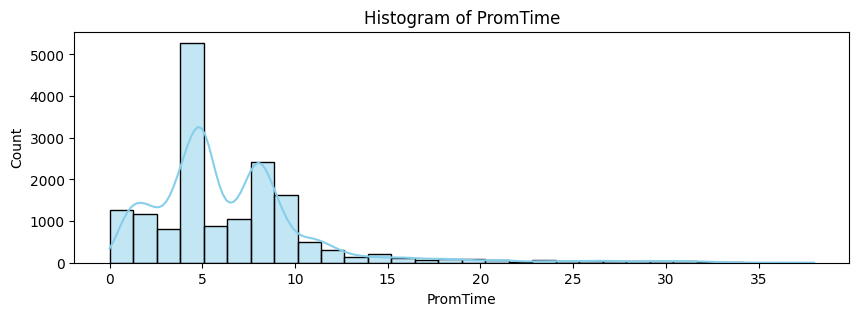

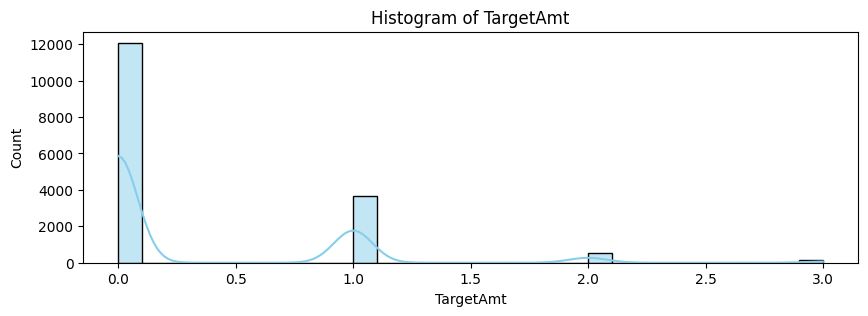

In [ ]:
# just taking a look at my numeric variables
numeric_features = ['DemAffl', 'DemAge', 'DemCluster',
       'PromSpend', 'PromTime', 'TargetAmt']

for feature in numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(df,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

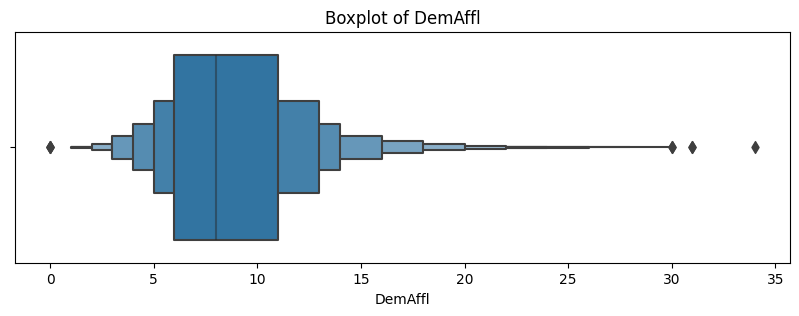

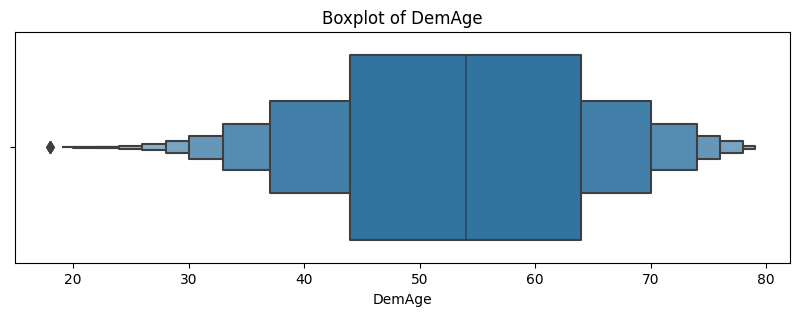

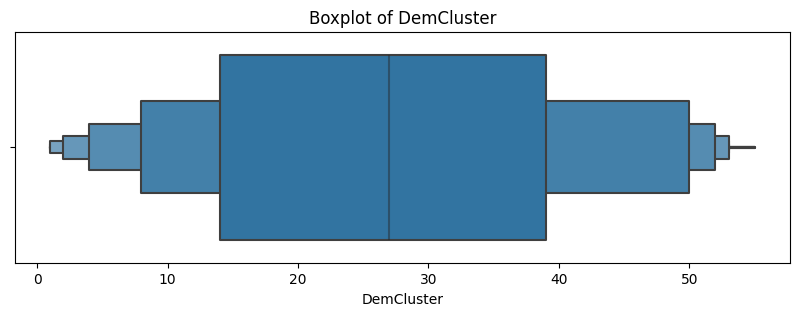

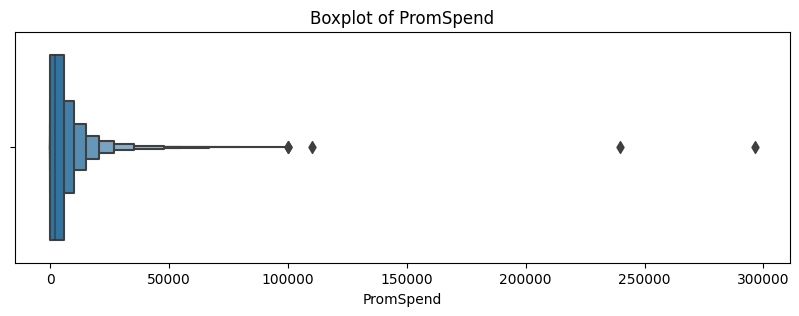

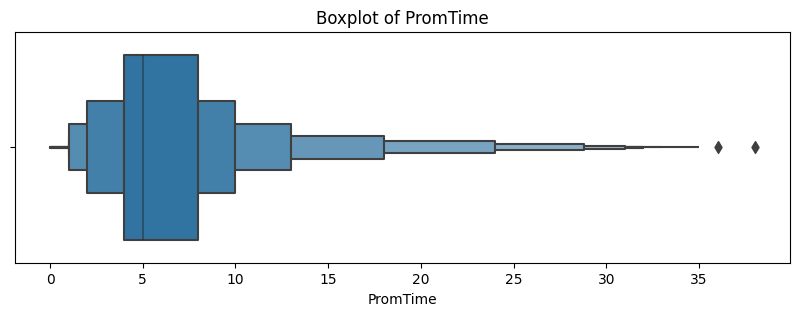

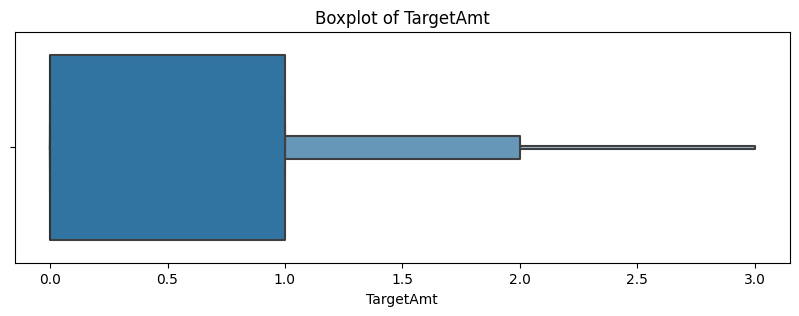

In [ ]:
# looking at numeric features to potentially ID outliers
for feature in numeric_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(df,x=feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

In [ ]:
# Get the list of numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass'], dtype='object')

In [ ]:
# creating my categorical features for the for loop visual creation
categorical_features = ['DemClusterGroup','DemGender','DemReg','PromClass']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16408 entries, 0 to 22221
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          16408 non-null  float64 
 1   DemAge           16408 non-null  float64 
 2   DemCluster       16408 non-null  float64 
 3   DemClusterGroup  16408 non-null  object  
 4   DemGender        16408 non-null  object  
 5   DemReg           16408 non-null  object  
 6   DemTVReg         16408 non-null  object  
 7   PromClass        16408 non-null  object  
 8   PromSpend        16408 non-null  float64 
 9   PromTime         16408 non-null  float64 
 10  TargetBuy        16408 non-null  category
 11  TargetAmt        16408 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 1.5+ MB


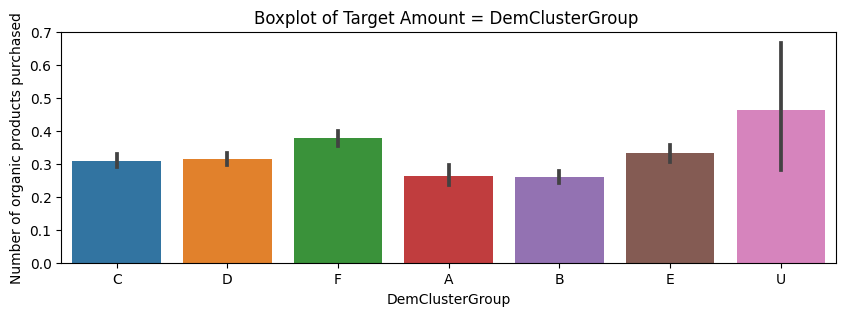

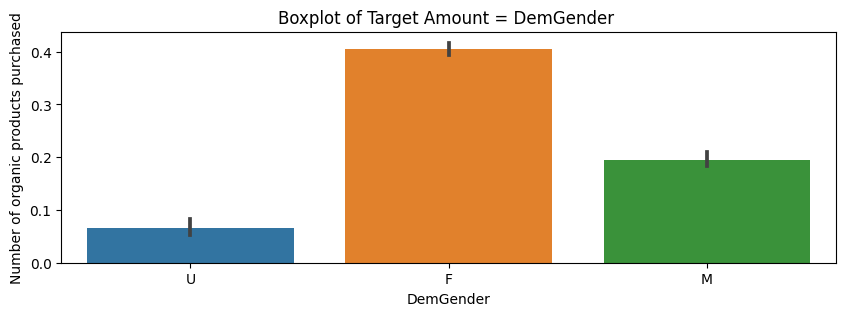

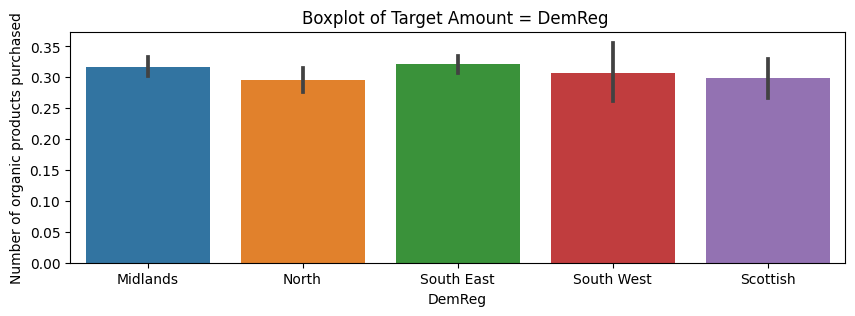

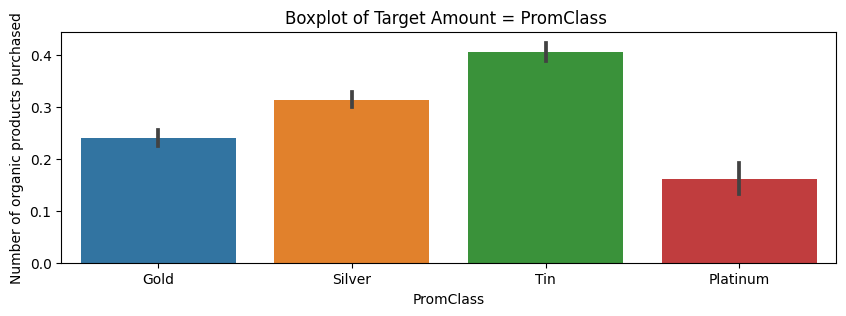

In [ ]:
for category in categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.barplot(df,x=category, y='TargetAmt')
  plt.title(f'Boxplot of Target Amount = {category} ')
  plt.xlabel(category)
  plt.ylabel('Number of organic products purchased')
  # Display the plot
  plt.show()

In [ ]:
# maybe dropping this one will stop the singular matrix error
df.drop(['TargetAmt'], axis=1, inplace=True)

In [ ]:
# maybe dropping this one will stop the singular matrix error
df2.drop(['TargetAmt'], axis=1, inplace=True)

# Full Logistic Regression: Model 1

In [ ]:
# split the data into training and testing sets
X = df.drop(['TargetBuy'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['DemAffl', 'DemAge','DemCluster','DemClusterGroup', 'DemGender','DemReg','DemTVReg','PromClass','PromSpend','PromTime']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['DemCluster','DemClusterGroup','DemGender','DemReg','DemTVReg','PromClass'], drop_first=True)

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                11485 non-null  float64
 1   DemAge                 11485 non-null  float64
 2   PromSpend              11485 non-null  float64
 3   PromTime               11485 non-null  float64
 4   DemCluster_2.0         11485 non-null  uint8  
 5   DemCluster_3.0         11485 non-null  uint8  
 6   DemCluster_4.0         11485 non-null  uint8  
 7   DemCluster_5.0         11485 non-null  uint8  
 8   DemCluster_6.0         11485 non-null  uint8  
 9   DemCluster_7.0         11485 non-null  uint8  
 10  DemCluster_8.0         11485 non-null  uint8  
 11  DemCluster_9.0         11485 non-null  uint8  
 12  DemCluster_10.0        11485 non-null  uint8  
 13  DemCluster_11.0        11485 non-null  uint8  
 14  DemCluster_12.0        11485 non-null  uint8  
 15

In [ ]:
# code did not run for fitting so checking the correlations, according to stackoverflow
df.corr()

,DemAffl,DemAge,DemCluster,PromSpend,PromTime
DemAffl,1.000000,-0.145413,0.036113,-0.033755,-0.033756
DemAge,-0.145413,1.000000,-0.178039,0.276854,0.213042
DemCluster,0.036113,-0.178039,1.000000,-0.106347,-0.054799
PromSpend,-0.033755,0.276854,-0.106347,1.000000,0.037702
PromTime,-0.033756,0.213042,-0.054799,0.037702,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16408 entries, 0 to 22221
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          16408 non-null  float64 
 1   DemAge           16408 non-null  float64 
 2   DemCluster       16408 non-null  float64 
 3   DemClusterGroup  16408 non-null  object  
 4   DemGender        16408 non-null  object  
 5   DemReg           16408 non-null  object  
 6   DemTVReg         16408 non-null  object  
 7   PromClass        16408 non-null  object  
 8   PromSpend        16408 non-null  float64 
 9   PromTime         16408 non-null  float64 
 10  TargetBuy        16408 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y = y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.446928
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                11485
Model:                          Logit   Df Residuals:                    11410
Method:                           MLE   Df Model:                           74
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.2256
Time:                        01:08:58   Log-Likelihood:                -5133.0
converged:                       True   LL-Null:                       -6628.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3071        nan        nan        nan         nan         

In [ ]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   DemAffl                11485 non-null  float64 
 1   DemAge                 11485 non-null  float64 
 2   PromSpend              11485 non-null  float64 
 3   PromTime               11485 non-null  float64 
 4   DemCluster_2.0         11485 non-null  uint8   
 5   DemCluster_3.0         11485 non-null  uint8   
 6   DemCluster_4.0         11485 non-null  uint8   
 7   DemCluster_5.0         11485 non-null  uint8   
 8   DemCluster_6.0         11485 non-null  uint8   
 9   DemCluster_7.0         11485 non-null  uint8   
 10  DemCluster_8.0         11485 non-null  uint8   
 11  DemCluster_9.0         11485 non-null  uint8   
 12  DemCluster_10.0        11485 non-null  uint8   
 13  DemCluster_11.0        11485 non-null  uint8   
 14  DemCluster_12.0        11485 non-n

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[7917 1766]
 [ 537 1265]]
[[3411  749]
 [ 218  545]]


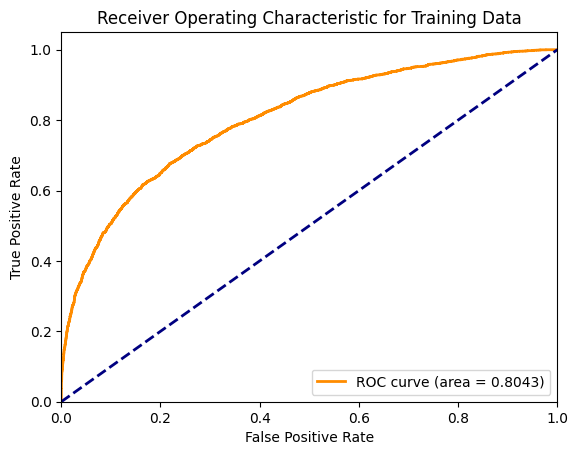

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

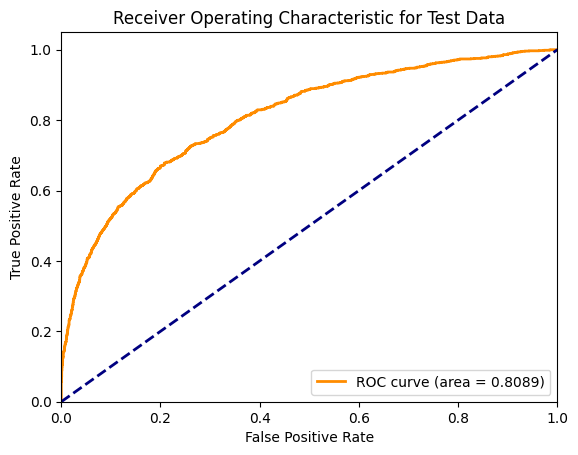

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.7995
Precision (Train): 0.7020
Recall (Train)  : 0.4174

Accuracy (Test) : 0.8036
Precision (Test): 0.7143
Recall (Test)  : 0.4212



# Reduced Logistic Regression (Stepwise):  Model 2

In [ ]:
# split the data into training and testing sets
X2 = df.drop(['TargetBuy', 'DemCluster', 'DemTVReg'], axis=1)
#Full model minus variables causing singularities in the model
X2=df[['DemAffl', 'DemAge','DemClusterGroup', 'DemGender','DemReg','PromClass','PromSpend','PromTime']]
#Create dummy variables for nominal inputs
X2 = pd.get_dummies(X2, columns=['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first=True)

y2 = df['TargetBuy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             11485 non-null  float64
 1   DemAge              11485 non-null  float64
 2   PromSpend           11485 non-null  float64
 3   PromTime            11485 non-null  float64
 4   DemClusterGroup_B   11485 non-null  uint8  
 5   DemClusterGroup_C   11485 non-null  uint8  
 6   DemClusterGroup_D   11485 non-null  uint8  
 7   DemClusterGroup_E   11485 non-null  uint8  
 8   DemClusterGroup_F   11485 non-null  uint8  
 9   DemClusterGroup_U   11485 non-null  uint8  
 10  DemGender_M         11485 non-null  uint8  
 11  DemGender_U         11485 non-null  uint8  
 12  DemReg_North        11485 non-null  uint8  
 13  DemReg_Scottish     11485 non-null  uint8  
 14  DemReg_South East   11485 non-null  uint8  
 15  DemReg_South West   11485 non-null  uint8  
 16  

In [ ]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.449652
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                11485
Model:                          Logit   Df Residuals:                    11465
Method:                           MLE   Df Model:                           19
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.2209
Time:                        01:09:49   Log-Likelihood:                -5164.3
converged:                       True   LL-Null:                       -6628.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3107      0.183     -1.696      0.090      -0.670       0.048
DemAf

In [ ]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   DemAffl             11485 non-null  float64 
 1   DemAge              11485 non-null  float64 
 2   PromSpend           11485 non-null  float64 
 3   PromTime            11485 non-null  float64 
 4   DemClusterGroup_B   11485 non-null  uint8   
 5   DemClusterGroup_C   11485 non-null  uint8   
 6   DemClusterGroup_D   11485 non-null  uint8   
 7   DemClusterGroup_E   11485 non-null  uint8   
 8   DemClusterGroup_F   11485 non-null  uint8   
 9   DemClusterGroup_U   11485 non-null  uint8   
 10  DemGender_M         11485 non-null  uint8   
 11  DemGender_U         11485 non-null  uint8   
 12  DemReg_North        11485 non-null  uint8   
 13  DemReg_Scottish     11485 non-null  uint8   
 14  DemReg_South East   11485 non-null  uint8   
 15  DemReg_South West   11485 non-nu

In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[7925 1775]
 [ 529 1256]]
[[3411  748]
 [ 218  546]]


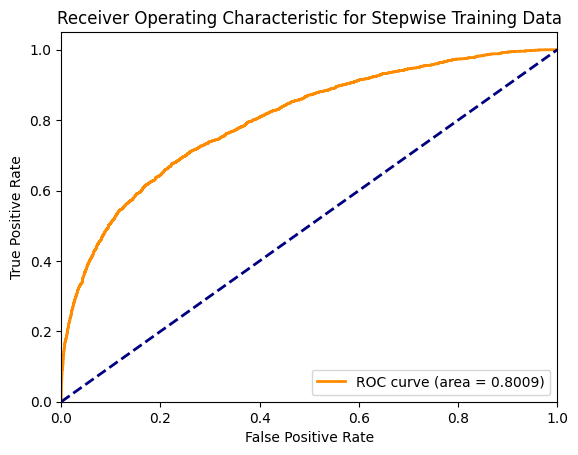

In [ ]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

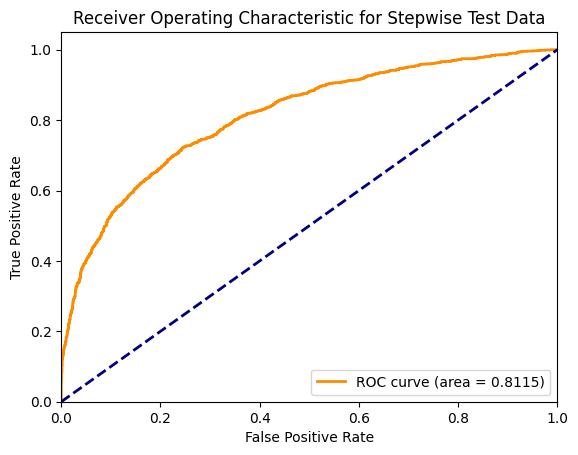

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.7994
Precision (Train): 0.7036
Recall (Train)  : 0.4144

Accuracy (Test) : 0.8038
Precision (Test): 0.7147
Recall (Test)  : 0.4219



# Decision Tree: Model 3

In [ ]:
# making categorical columns into numerical dummies
def dummyize(x, columns):
  for column in range(0, len(columns)):
      if x == columns[column]:
          return column

In [ ]:
# making dummies from categorical columns
df2["DemGender"] = df2["DemGender"].apply(lambda x: dummyize(x, pd.get_dummies(df2['DemGender']).columns))
df2["DemClusterGroup"] = df2["DemClusterGroup"].apply(lambda x: dummyize(x, pd.get_dummies(df2['DemClusterGroup']).columns))
df2["DemReg"] = df2["DemReg"].apply(lambda x: dummyize(x, pd.get_dummies(df2['DemReg']).columns))
df2["PromClass"] = df2["PromClass"].apply(lambda x: dummyize(x, pd.get_dummies(df2['PromClass']).columns))
df2["DemTVReg"] = df2["DemTVReg"].apply(lambda x: dummyize(x, pd.get_dummies(df2['DemTVReg']).columns))

In [ ]:
df2.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,0,10,0,16000.00,4.0,0
1,4.0,49.0,35.0,3,2,0,10,0,6000.00,5.0,0
2,5.0,70.0,27.0,3,0,0,10,2,0.02,8.0,1
3,10.0,65.0,51.0,5,1,0,4,3,0.01,7.0,1
4,11.0,68.0,4.0,0,0,0,4,3,0.01,8.0,0


In [ ]:
# split the data into training and testing sets
X3 = df2.drop(['TargetBuy'], axis=1)

y3 = df2['TargetBuy']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          11485 non-null  float64
 1   DemAge           11485 non-null  float64
 2   DemCluster       11485 non-null  float64
 3   DemClusterGroup  11485 non-null  int64  
 4   DemGender        11485 non-null  int64  
 5   DemReg           11485 non-null  int64  
 6   DemTVReg         11485 non-null  int64  
 7   PromClass        11485 non-null  int64  
 8   PromSpend        11485 non-null  float64
 9   PromTime         11485 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 987.0 KB
<class 'pandas.core.series.Series'>
Int64Index: 11485 entries, 15683 to 21368
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
11485 non-null  category
dtypes: category(1)
memory usage: 101.1 KB


In [ ]:
# create an instance of a decision tree classifier using default values

dt1 = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt1.fit(X3_train, y3_train)


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt1, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

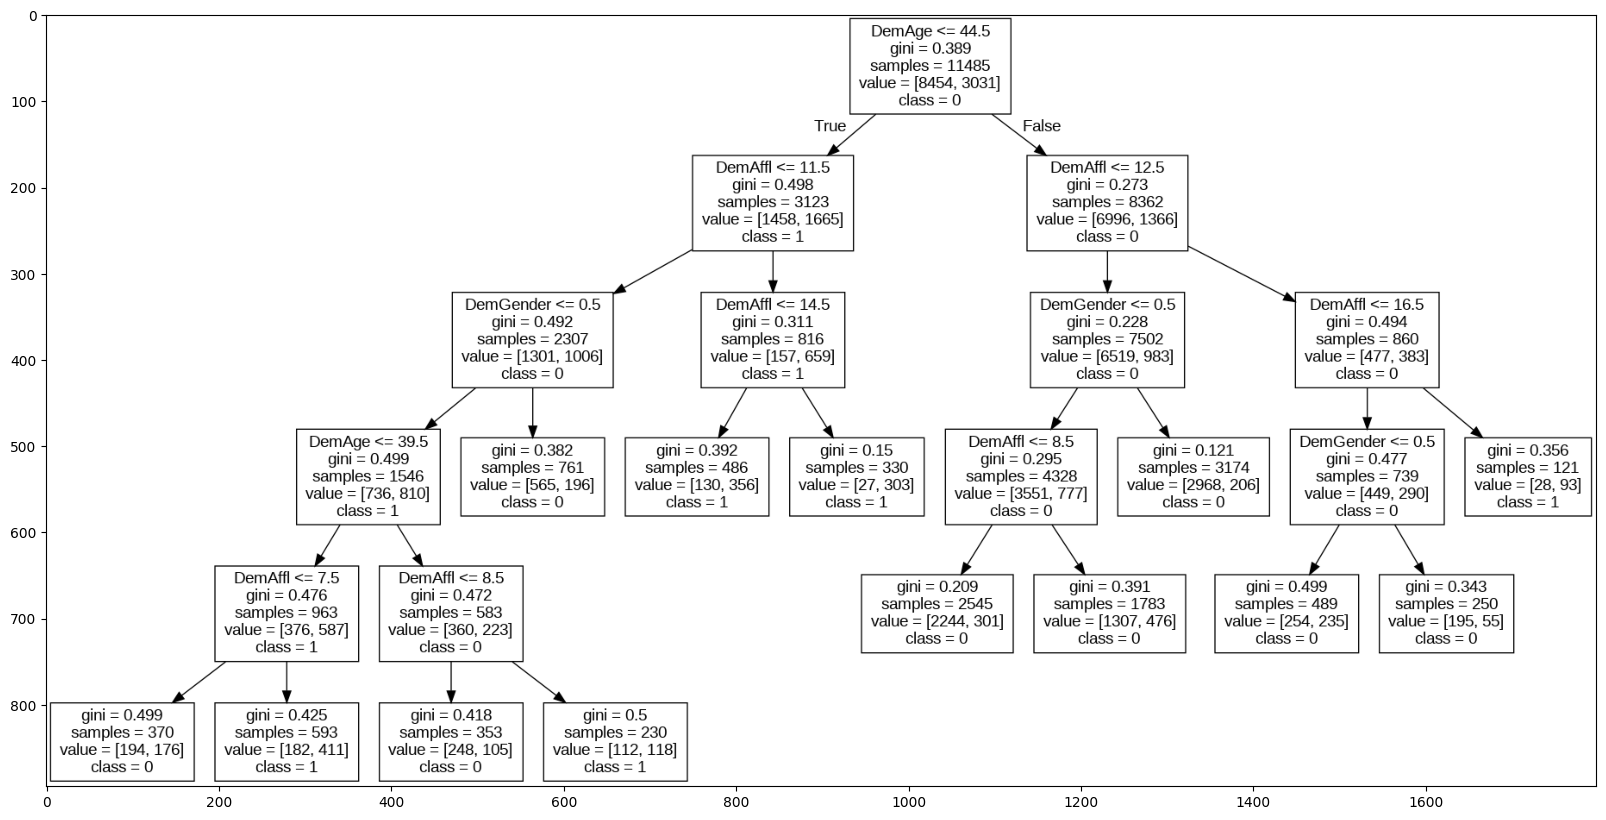

In [ ]:
# showing my tree
export_graphviz(dt1,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X3_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y3_pred_train = dt1.predict(X3_train)
y3_pred_test = dt1.predict(X3_test)

y3_prob_train = dt1.predict_proba(X3_train)
y3_prob_test = dt1.predict_proba(X3_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y3_train, y3_pred_train)
prec_train = precision_score(y3_train, y3_pred_train)
rec_train = recall_score(y3_train, y3_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y3_test, y3_pred_test)
prec_test = precision_score(y3_test, y3_pred_test)
rec_test = recall_score(y3_test, y3_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8059
Precision: 0.7278
Recall.  : 0.4226

 -- test set -- 
Accuracy : 0.8121
Precision: 0.7510
Recall.  : 0.4266


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y3_pred_train, y3_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y3_pred_test, y3_test)
print(conf_matrix)

[[7975 1750]
 [ 479 1281]]
[[3446  742]
 [ 183  552]]


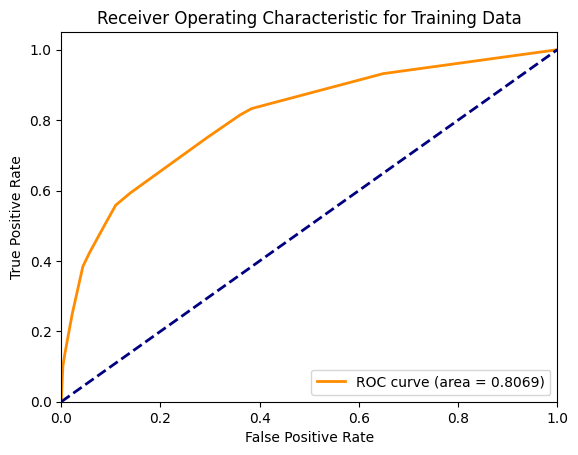

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y3_train.cat.codes, y3_prob_train[:,1])
roc_auc = roc_auc_score(y3_train.cat.codes, y3_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

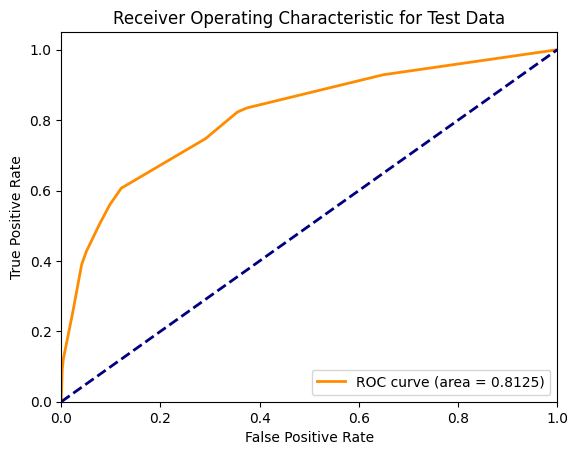

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y3_test.cat.codes, y3_prob_test[:,1])
roc_auc = roc_auc_score(y3_test.cat.codes, y3_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

   importance          feature
1    0.529572           DemAge
0    0.355598          DemAffl
4    0.114830        DemGender
2    0.000000       DemCluster
3    0.000000  DemClusterGroup
5    0.000000           DemReg
6    0.000000         DemTVReg
7    0.000000        PromClass
8    0.000000        PromSpend
9    0.000000         PromTime


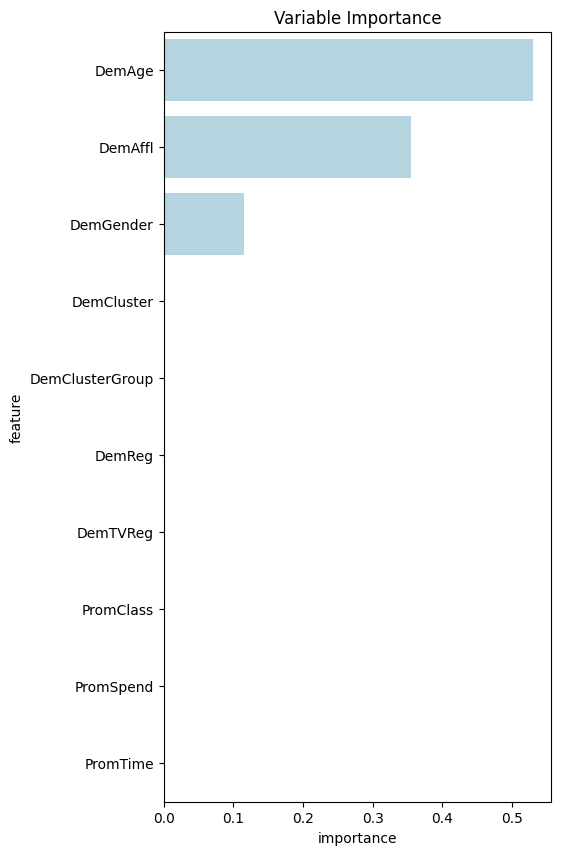

In [ ]:
#calculate feature importance
tree_imp = dt1.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
imp_df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
imp_df['feature']=X3.columns

#sort data so features with largest importance values are at the top
imp_df2 = imp_df.sort_values(by=['importance'], ascending=False)

print(imp_df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=imp_df2,
            y=imp_df2['feature'],
            x=imp_df2['importance'], color="lightblue")

plt.show()

# Tuned Parameters Tree: Model 4

In [ ]:
# split the data into training and testing sets
X4 = df2.drop(['TargetBuy'], axis=1)

y4 = df2['TargetBuy']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

X4_train.info()
y4_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 15683 to 21368
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          11485 non-null  float64
 1   DemAge           11485 non-null  float64
 2   DemCluster       11485 non-null  float64
 3   DemClusterGroup  11485 non-null  int64  
 4   DemGender        11485 non-null  int64  
 5   DemReg           11485 non-null  int64  
 6   DemTVReg         11485 non-null  int64  
 7   PromClass        11485 non-null  int64  
 8   PromSpend        11485 non-null  float64
 9   PromTime         11485 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 987.0 KB
<class 'pandas.core.series.Series'>
Int64Index: 11485 entries, 15683 to 21368
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
11485 non-null  category
dtypes: category(1)
memory usage: 101.1 KB


In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X4_train, y4_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=100)


In [ ]:
# create an instance of a decision tree classifier using best tuned values

dt_tune = DecisionTreeClassifier(max_depth = None, min_samples_leaf=100, ccp_alpha = 0.001)

# fit the model to the training data
dt_tune.fit(X4_train, y4_train)

DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt_tune, filled=True, rounded=True, feature_names=X4.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

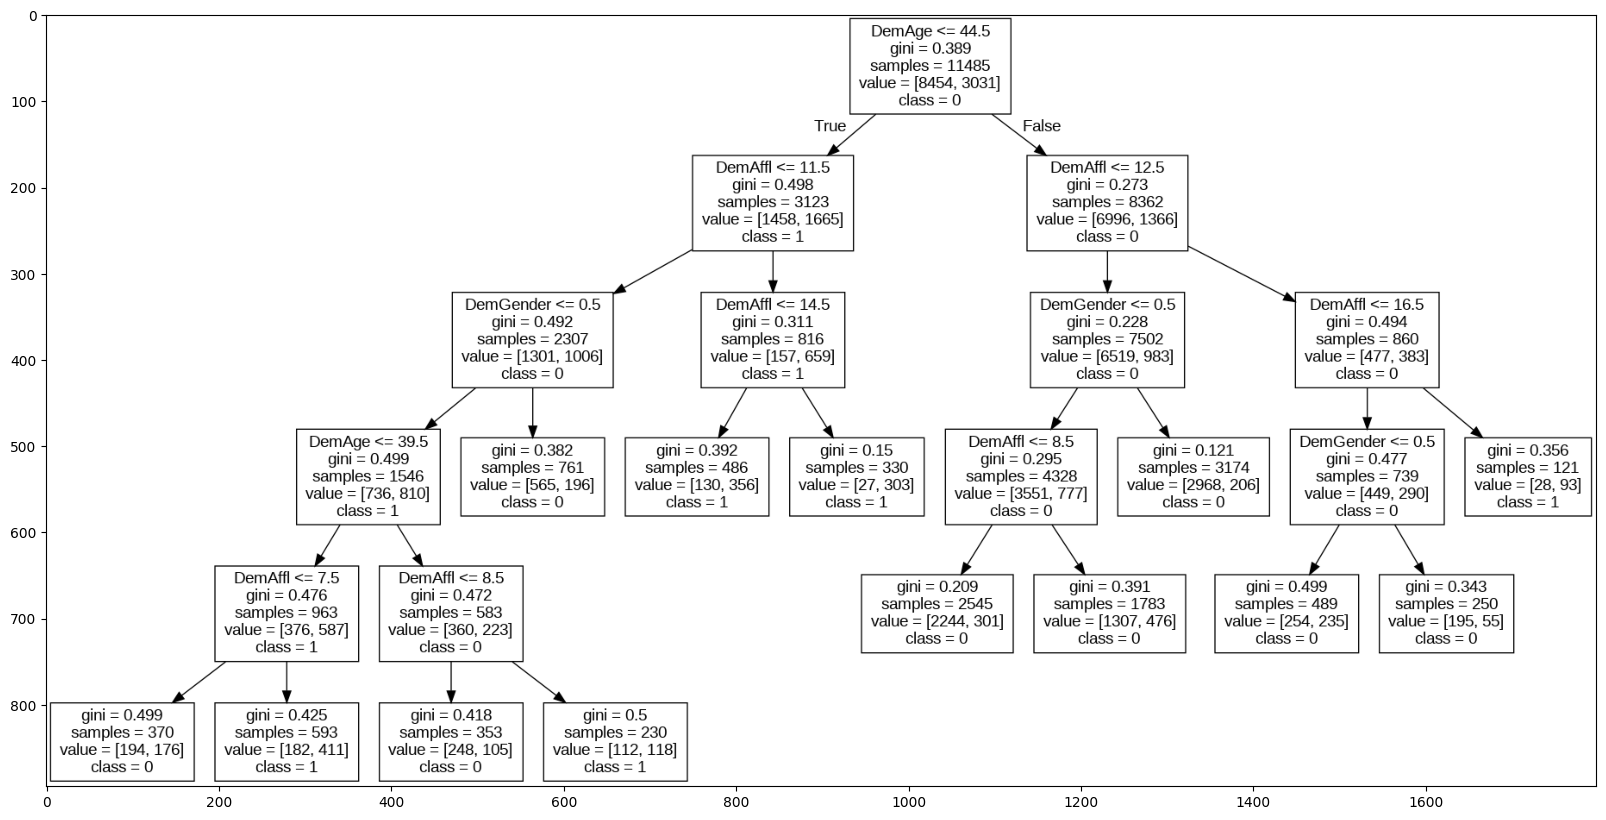

In [ ]:
# showing my tree
export_graphviz(dt_tune,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X4_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y4_pred_train = dt_tune.predict(X4_train)
y4_pred_test = dt_tune.predict(X4_test)

y4_prob_train = dt_tune.predict_proba(X4_train)
y4_prob_test = dt_tune.predict_proba(X4_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y4_train, y4_pred_train)
prec_train = precision_score(y4_train, y4_pred_train)
rec_train = recall_score(y4_train, y4_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y4_test, y4_pred_test)
prec_test = precision_score(y4_test, y4_pred_test)
rec_test = recall_score(y4_test, y4_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8059
Precision: 0.7278
Recall.  : 0.4226

 -- test set -- 
Accuracy : 0.8121
Precision: 0.7510
Recall.  : 0.4266


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y4_pred_train, y4_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y4_pred_test, y4_test)
print(conf_matrix)

[[7975 1750]
 [ 479 1281]]
[[3446  742]
 [ 183  552]]


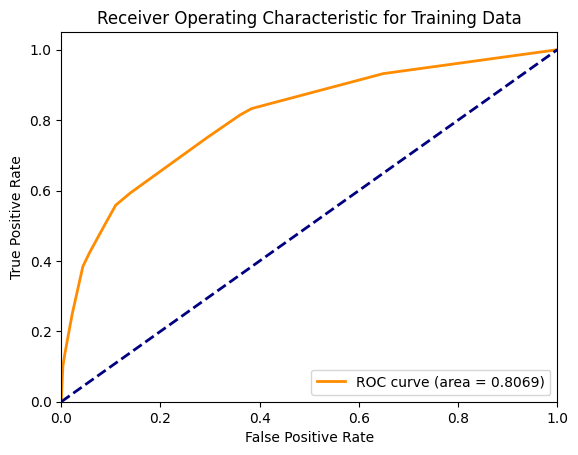

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y4_train.cat.codes, y4_prob_train[:,1])
roc_auc = roc_auc_score(y4_train.cat.codes, y4_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

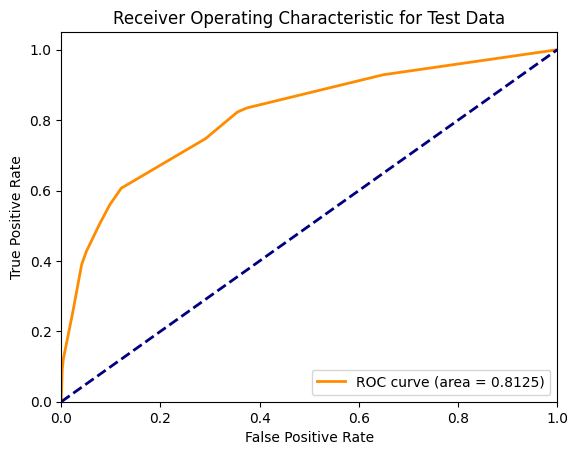

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y4_test.cat.codes, y4_prob_test[:,1])
roc_auc = roc_auc_score(y4_test.cat.codes, y4_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

   importance          feature
1    0.529572           DemAge
0    0.355598          DemAffl
4    0.114830        DemGender
2    0.000000       DemCluster
3    0.000000  DemClusterGroup
5    0.000000           DemReg
6    0.000000         DemTVReg
7    0.000000        PromClass
8    0.000000        PromSpend
9    0.000000         PromTime


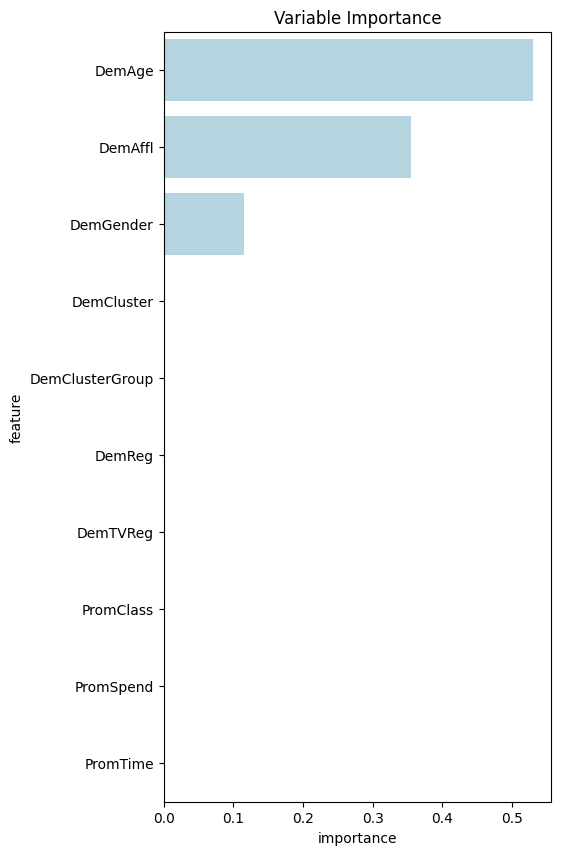

In [ ]:
#calculate feature importance
tree_imp2 = dt_tune.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
tune_imp_df = pd.DataFrame(data = tree_imp2,
                  columns = column_values)
tune_imp_df['feature']=X4.columns

#sort data so features with largest importance values are at the top
tune_imp_df2 = tune_imp_df.sort_values(by=['importance'], ascending=False)

print(tune_imp_df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=tune_imp_df2,
            y=tune_imp_df2['feature'],
            x=tune_imp_df2['importance'], color="lightblue")

plt.show()

# Scoring the new customers

In [ ]:
# load the data into a pandas dataframe

new_data_path = '/content/drive/My Drive/CSV Uploads/New_organics.csv'
dfnew = pd.read_csv(new_data_path)

# preview data
dfnew.info()
dfnew.head
print(dfnew)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
      ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender      DemReg  \
0      1        6      46          27               D         F  South East   
1      2       10      39          12               B         M    Midlands 

In [ ]:
# drop unnecessary columns
dfnew.drop(['ID'], axis=1, inplace=True)

# Convert response from an integer to a categorical variable
# dfnew['TargetBuy'] = dfnew['TargetBuy'].astype('category')
dfnew.head()

KeyError: ignored

In [ ]:
# making categorical columns into numerical dummies
def dummyize(x, columns):
  for column in range(0, len(columns)):
      if x == columns[column]:
          return column

In [ ]:
# making dummies from categorical columns
dfnew["DemGender"] = dfnew["DemGender"].apply(lambda x: dummyize(x, pd.get_dummies(dfnew['DemGender']).columns))
dfnew["DemClusterGroup"] = dfnew["DemClusterGroup"].apply(lambda x: dummyize(x, pd.get_dummies(dfnew['DemClusterGroup']).columns))
dfnew["DemReg"] = dfnew["DemReg"].apply(lambda x: dummyize(x, pd.get_dummies(dfnew['DemReg']).columns))
dfnew["PromClass"] = dfnew["PromClass"].apply(lambda x: dummyize(x, pd.get_dummies(dfnew['PromClass']).columns))
dfnew["DemTVReg"] = dfnew["DemTVReg"].apply(lambda x: dummyize(x, pd.get_dummies(dfnew['DemTVReg']).columns))

In [ ]:
# make predictions on the training and test data
Scored_class = dt_tune.predict(dfnew)
Scored_probs = dt_tune.predict_proba(dfnew)

dfnew['pred_organic'] = Scored_class
dfnew['prod_prob_organic']=Scored_probs[:,1]

print(dfnew)

     DemAffl  DemAge  DemCluster  DemClusterGroup  DemGender  DemReg  \
0          6      46          27                3          0       3   
1         10      39          12                1          1       0   
2          7      75          12                1          1       0   
3          7      72          12                1          0       0   
4          7      43          53                5          1       1   
..       ...     ...         ...              ...        ...     ...   
145        3      59          12                1          0       0   
146        8      69          16                2          1       3   
147        7      27          52                5          0       3   
148       10      63          14                1          1       3   
149       18      41          35                3          0       1   

     DemTVReg  PromClass  PromSpend  PromTime  pred_organic  prod_prob_organic  
0           2          3       0.01         8         

In [ ]:
scored_file = 'New_organics.xlsx'
dfnew.to_excel(scored_file)